In [64]:
import pandas as pd
import matplotlib.pyplot as plt

xls = pd.ExcelFile('/Users/olha/Desktop/pyth/lab6/FOR_LAB_6.xlsx')

df = pd.read_excel(xls)

# Task 1

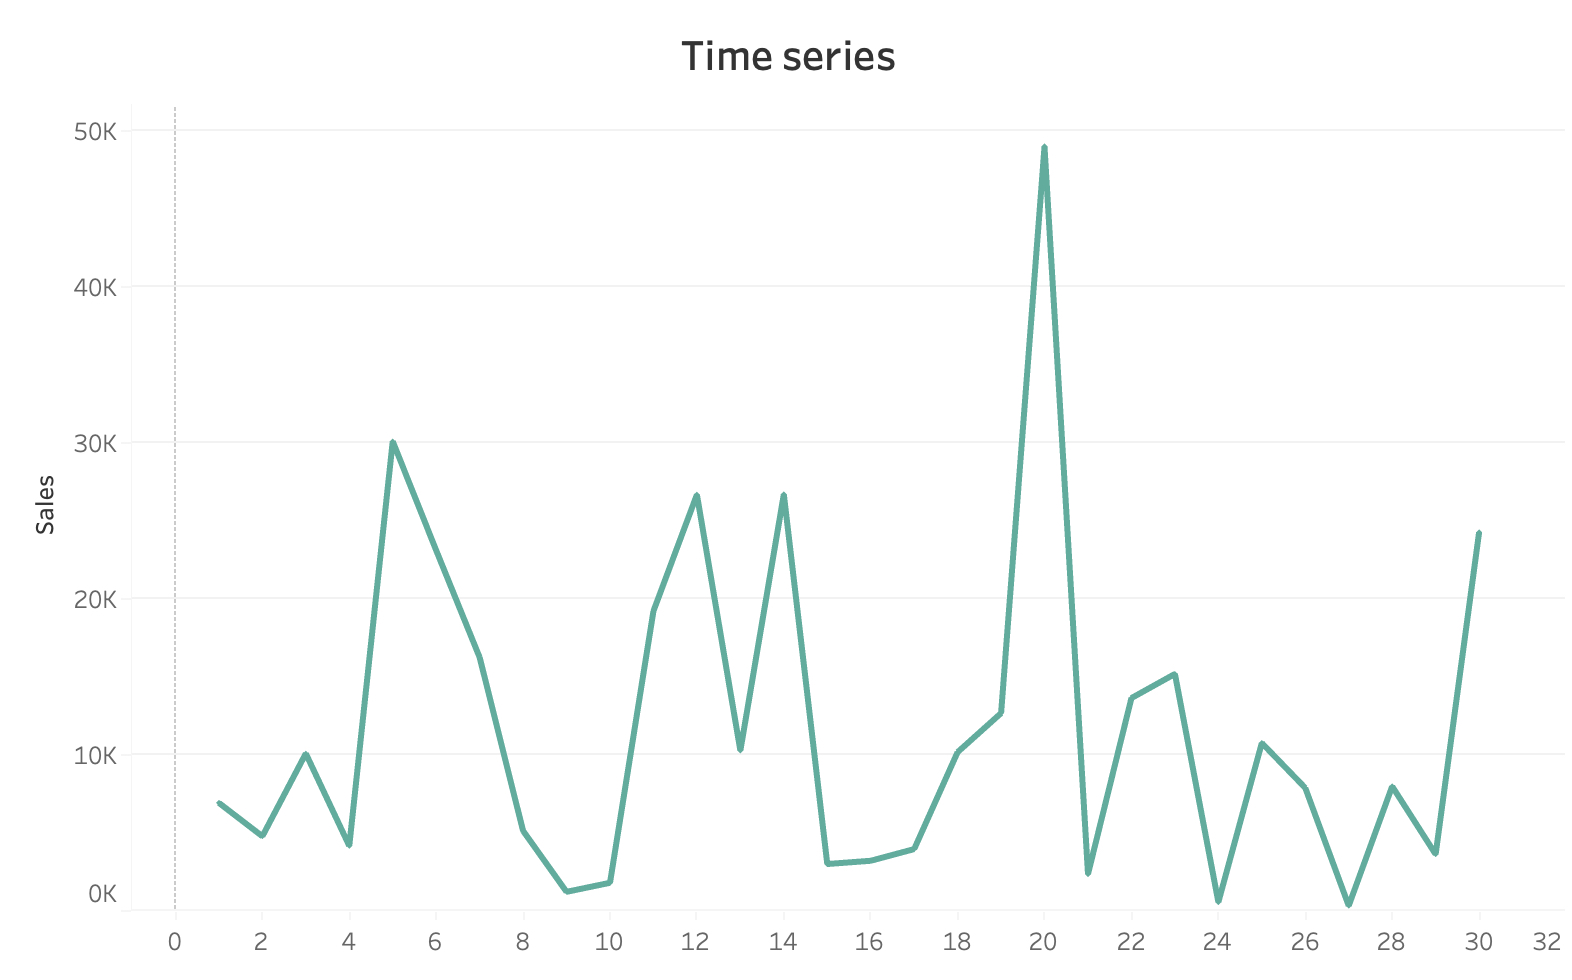

In [113]:
from IPython.display import Image
Image("/Users/olha/Downloads/iScreen Shoter - Tableau Public - 230918183014.jpg") 

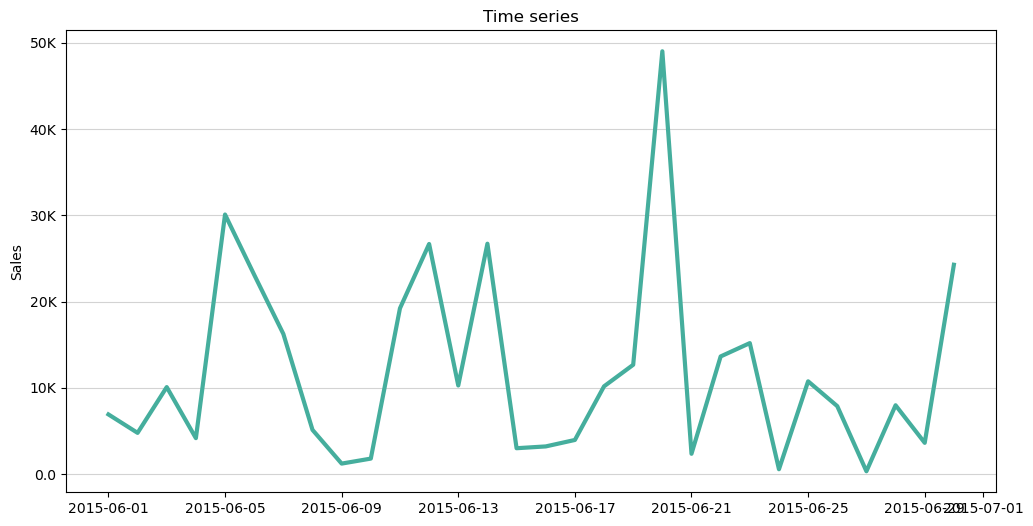

In [27]:
from matplotlib.ticker import FuncFormatter

start_date = pd.to_datetime('2015-06-01').date()
end_date = pd.to_datetime('2015-06-30').date()

filtered_df = df[(df['Order Date'] >= start_date) & (df['Order Date'] <= end_date)]
daily_sales = filtered_df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], color='#45ae9d', linewidth=3)

def format_y_ticks(value, tick_number):
    if value >= 1000:
        value = f"{int(value / 1000)}K"
    return f"{value}"

plt.gca().get_yaxis().set_major_formatter(FuncFormatter(format_y_ticks))

plt.title('Time series')
plt.ylabel('Sales')
plt.grid(axis='y', color='lightgray')
plt.show()



# Task 2

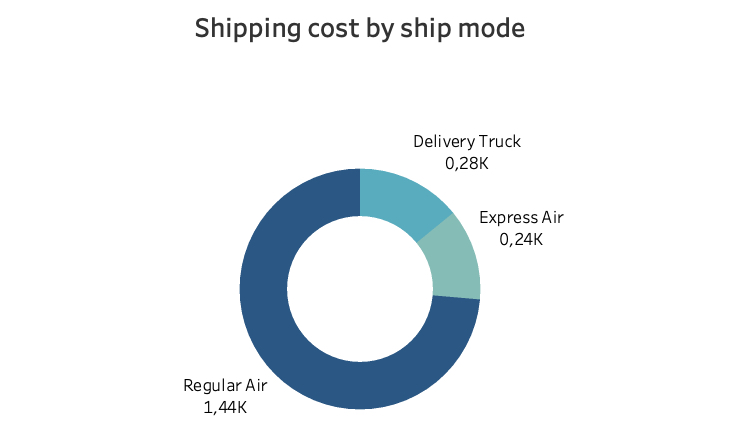

In [111]:
from IPython.display import Image
Image("/Users/olha/Downloads/iScreen Shoter - Tableau Public - 230919124518.jpg") 

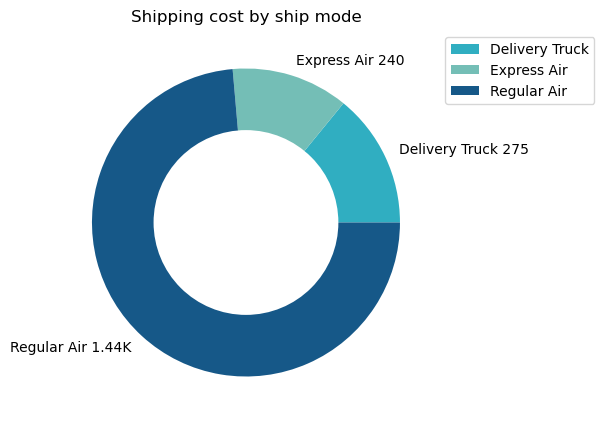

In [114]:
order_count_by_ship_mode = df.groupby('Ship Mode')['Order ID'].count()

labels = order_count_by_ship_mode.index
sizes = order_count_by_ship_mode.values
colors = ['#30aec1', '#74beb6', '#165888']

def format_count(count):
    if count >= 1000:
        return f"{count / 1000:.2f}K"
    else:
        return f"{count}"
    
legend_labels = [f"{label} {format_count(count)}" for label, count in zip(labels, sizes)]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=legend_labels, colors=colors, pctdistance=0.55, radius=1)


center_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Shipping cost by ship mode')

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


# Task 3

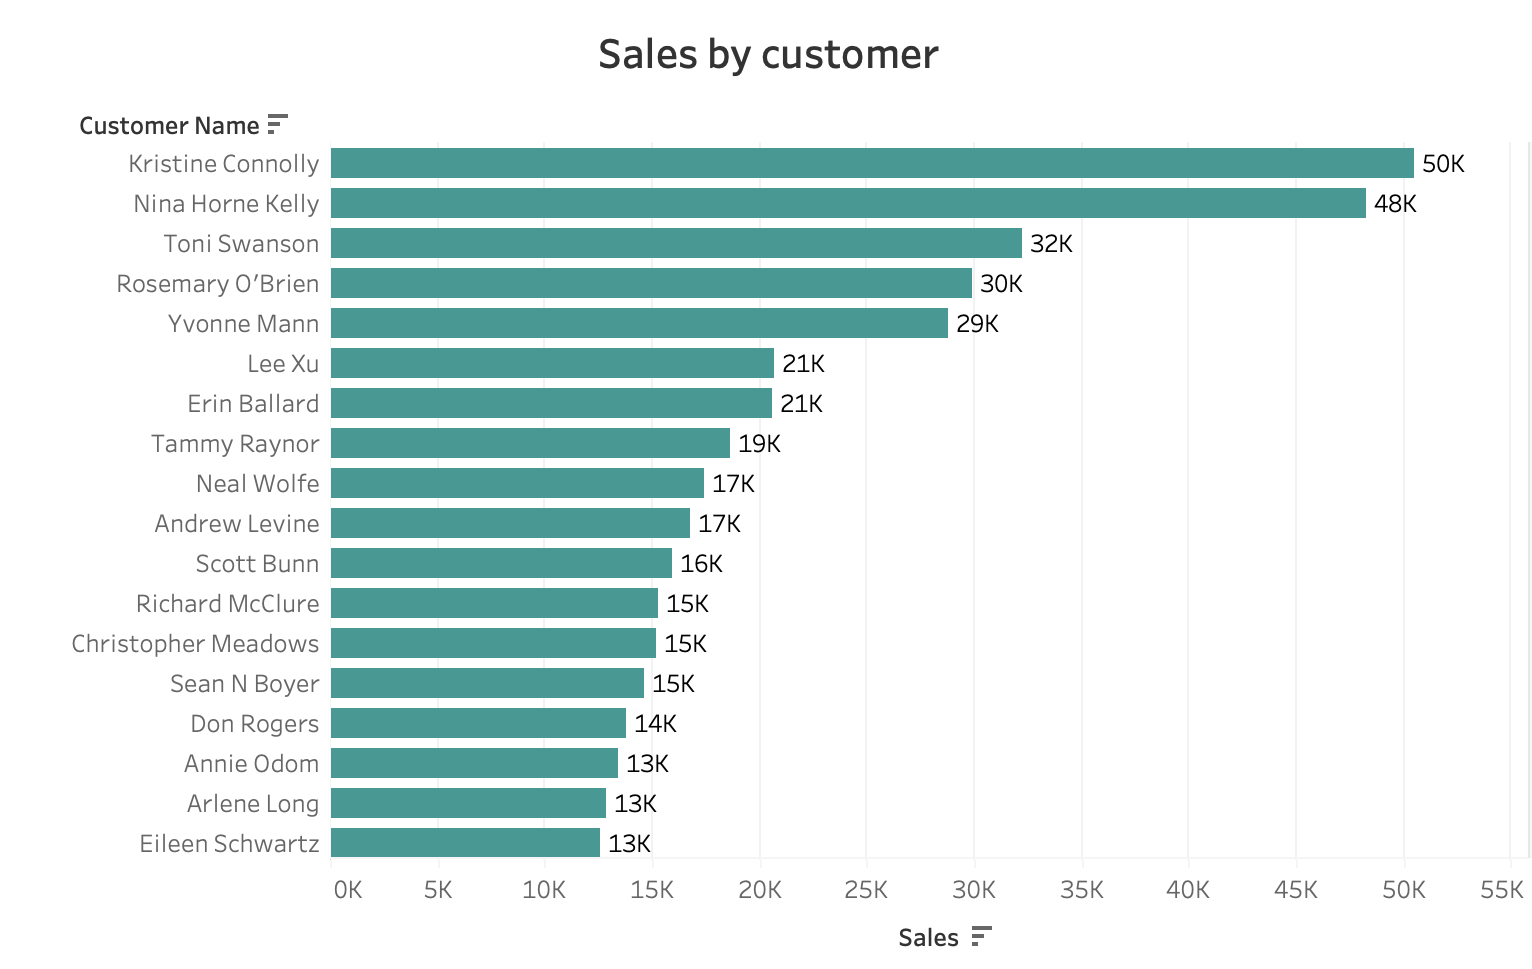

In [110]:
from IPython.display import Image
Image("/Users/olha/Downloads/iScreen Shoter - 20230918183051312.jpg") 

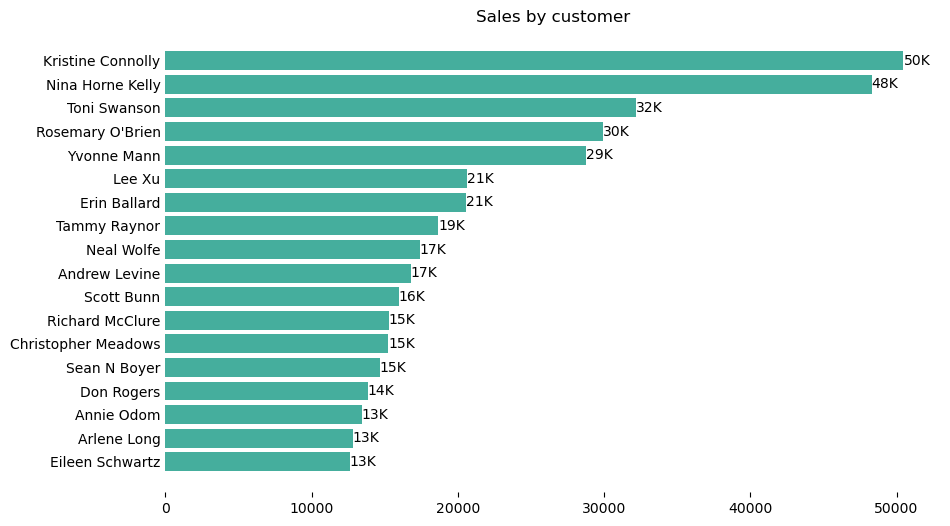

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

customers_df = pd.read_excel(xls, 'Customers')
sales_df = pd.read_excel(xls, 'Orders')

merged_df = pd.merge(sales_df, customers_df, on='Customer ID')

customer_sales = merged_df.groupby('Customer Name')['Sales'].sum().reset_index()
top_customers = customer_sales.nlargest(18, 'Sales')


def format_sales(sales):
    if sales >= 10000:
        return f"{sales / 1000:.0f}K"
    else:
        return str(sales)


plt.figure(figsize=(10, 6))
bars = plt.barh(top_customers['Customer Name'], top_customers['Sales'], color='#45ae9d')
plt.title('Sales by customer')
plt.gca().invert_yaxis()


for bar in bars:
    sales_value = bar.get_width()
    plt.text(sales_value, bar.get_y() + bar.get_height()/2, format_sales(sales_value),
             ha='left', va='center', color='black', fontsize=10)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='y', length=0)

plt.show()


# Task 4

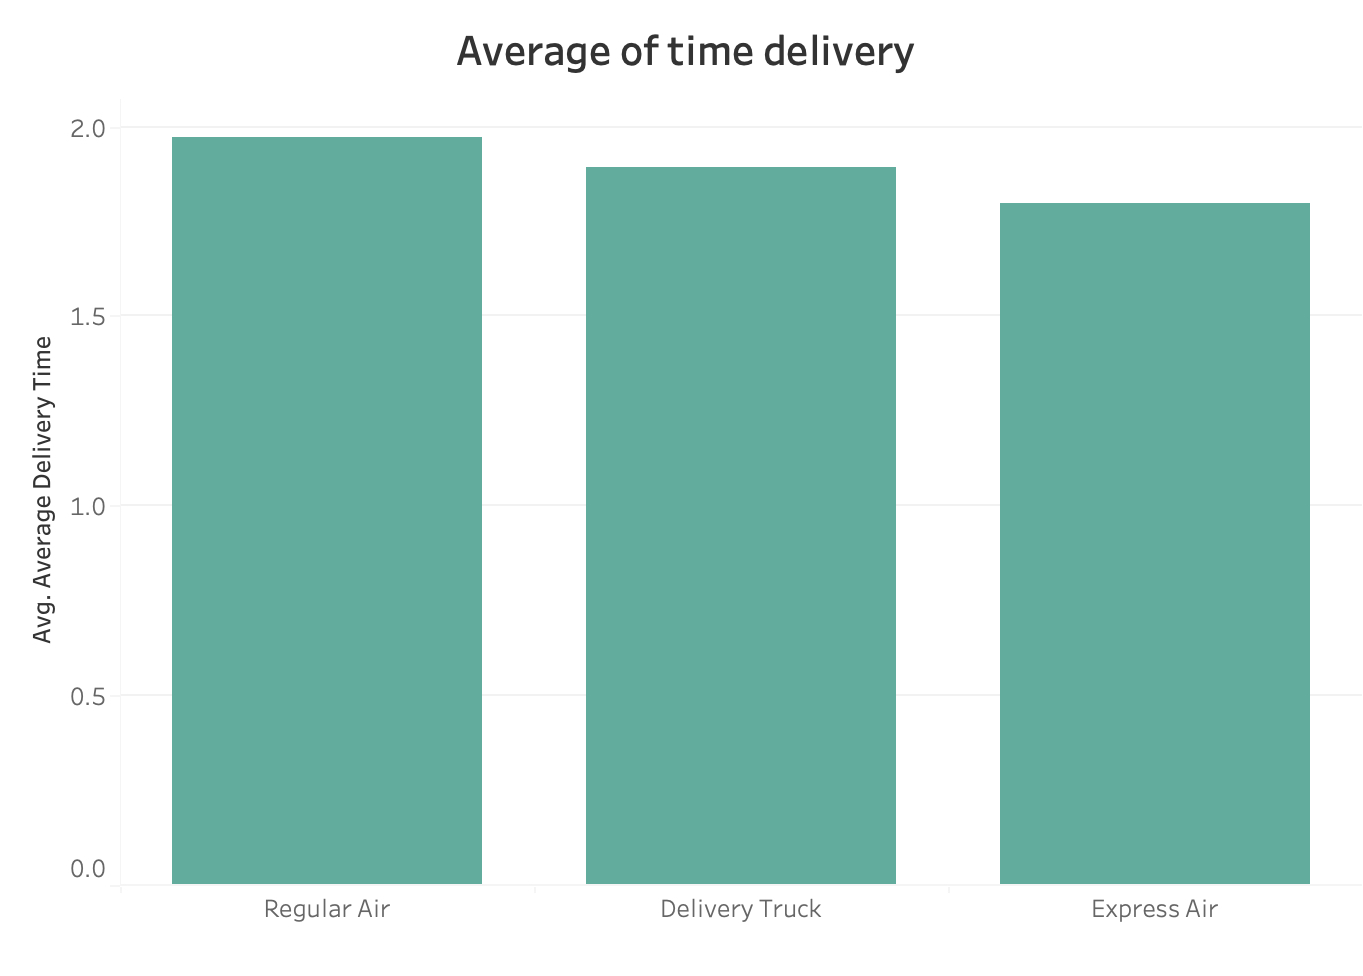

In [115]:
from IPython.display import Image
Image("/Users/olha/Downloads/iScreen Shoter - Tableau Public - 230919122936.jpg") 

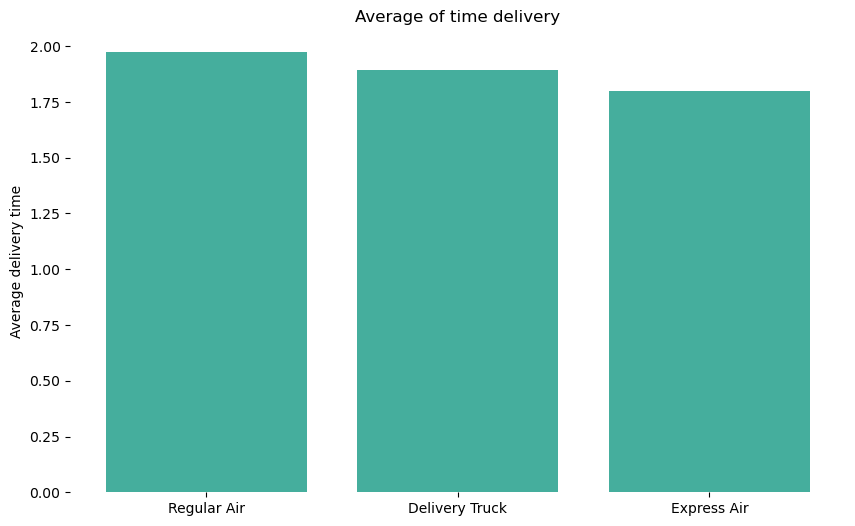

In [95]:
orders_df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

average_delivery_time = orders_df.groupby('Ship Mode')['Delivery Time'].mean().reset_index()

average_delivery_time = average_delivery_time.sort_values(by='Delivery Time', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(average_delivery_time['Ship Mode'], average_delivery_time['Delivery Time'], color='#45ae9d')
plt.ylabel('Average delivery time')
plt.title('Average of time delivery')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()
